In [1]:
pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras.models

In [13]:
pip install keras.datasets

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement keras.datasets (from versions: none)
ERROR: No matching distribution found for keras.datasets
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

2024-11-02 22:24:16.478828: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 22:24:16.604523: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 22:24:18.226184: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 22:24:19.326753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 22:24:20.132832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
x_train = np.loadtxt ('input.csv', delimiter = ',')

In [3]:
y_train = np.loadtxt("labels.csv", delimiter = ",")

x_test = np.loadtxt("input_test.csv", delimiter = ",")
y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [4]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [5]:
x_train = x_train.reshape(len(x_train), 100,100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(x_test), 1)

In [6]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [7]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

# After Normalization
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

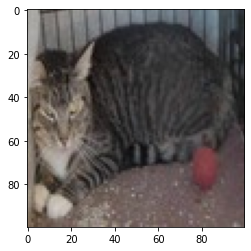

In [15]:
#Displaying random image from dataset

import matplotlib.pyplot as plt
import random

idx = random.randint (0,len(x_train))

plt.imshow(x_train[idx, :])
plt.show()

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.5198 - loss: 0.7125
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6056 - loss: 0.6679
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6129 - loss: 0.6663
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7318 - loss: 0.5390
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7635 - loss: 0.5033


In [12]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6487 - loss: 0.6145


[0.6150789260864258, 0.6600000262260437]

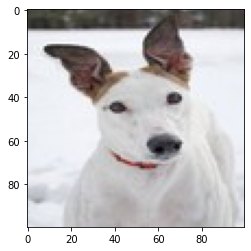

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
It is a  dog


In [21]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'  

print("It is a ", pred)   